In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


###Presentación de la Solución

Responda las siguientes preguntas (en un cuaderno de ipython, documento de `.Rmd`, o `shinyapp` ):

1. Qué otros datos pueden ayudarlo a mejorar su predicción?
2. Cuál día de la semana presenta el número mayor de órdenes?
3. Cuál día de la semana presenta el menor número de órdenes?

Su solución debe llevarse a cabo en el repositorio `HW8_NombreApellido` y debe incluir:
- El código que detalla su modelo predictivo.
- Cualquier intuición y/o visualizaciones que usted obtenga a partir de esos datos.
- Las respuestas a las preguntas planteadas.

###Cargar los datos

In [2]:
!ls
!wc test_set.csv
!wc training_set.csv

Ejemplos  prediccion.csv  sample_submission.csv  test_set.csv	   wc
hw8.pdf   README.md	  Solucion.ipynb	 training_set.csv
  47   47 1904 test_set.csv
 138  138 6059 training_set.csv


In [91]:
data = pd.read_csv('training_set.csv')
data['temp_m'] = (data.temp_max+data.temp_min)/2
data.head()

,fecha,cod_calendario,conteo_ordenes,conteo_restaurantes,temp_max,temp_min,precipitacion,eventos,temp_m
0,2012-09-01,0,165,6,30.6,22.8,0.0,Lluvia,26.70
1,2012-09-02,1,138,8,32.8,22.8,15.5,Lluvia-Tormenta,27.80
2,2012-09-03,1,127,9,29.4,18.3,0.0,Ninguno,23.85
3,2012-09-04,1,174,10,29.4,17.2,0.0,Ninguno,23.30
4,2012-09-05,1,196,11,30.6,21.7,0.0,Niebla,26.15


In [92]:
print(data.shape)

(137, 9)


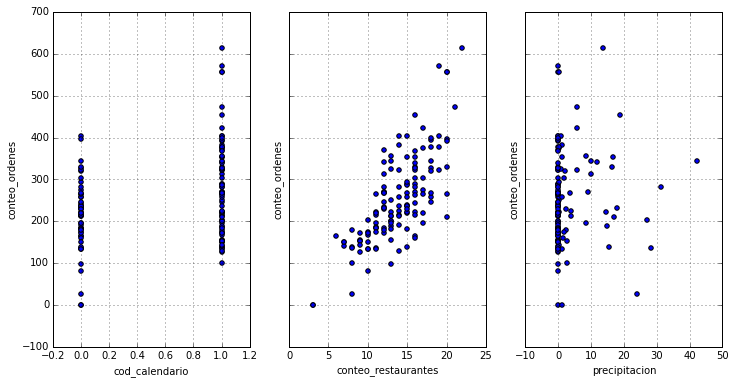

In [93]:
fig, axs = subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='cod_calendario', y='conteo_ordenes', ax=axs[0], figsize=(12, 6))
data.plot(kind='scatter', x='conteo_restaurantes', y='conteo_ordenes',ax=axs[1])
data.plot(kind='scatter', x='precipitacion', y='conteo_ordenes', ax=axs[2])

A partir de las gráficas se puede inferir que existe una correlacion fuerte entre el _cod_calendario_ y la salida. Tambien existe relacion fuerte entre el _conteo_restaurantes_ y la salida

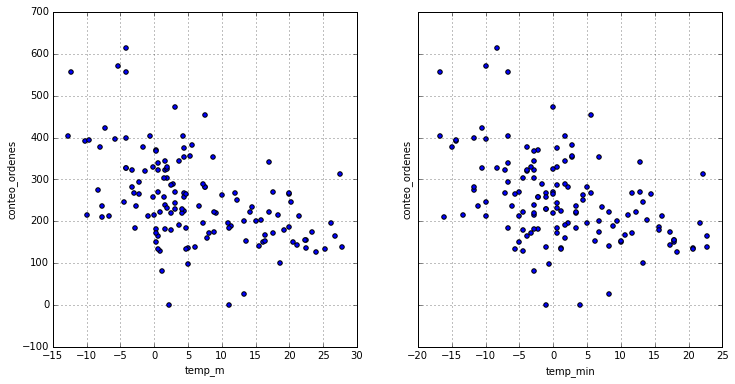

In [94]:
fig, axs = subplots(1, 2, sharey=True)
data.plot(kind='scatter', x='temp_m', y='conteo_ordenes', ax=axs[0], figsize=(12, 6))
data.plot(kind='scatter', x='temp_min', y='conteo_ordenes', ax=axs[1])

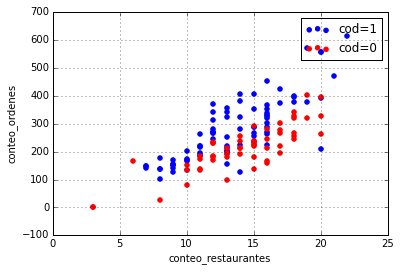

In [98]:
data_1 = data[data.cod_calendario==1]
data_0 = data[data.cod_calendario==0]

fig, axs = subplots(1, 1, sharey=True)
#data.plot(kind='scatter', x='cod_calendario', y='conteo_ordenes', ax=axs[0], figsize=(12, 6))
data_1.plot(kind='scatter', x='conteo_restaurantes', y='conteo_ordenes', color='b',ax=axs,label='cod=1')
data_0.plot(kind='scatter', x='conteo_restaurantes', y='conteo_ordenes', color='r',ax=axs,label='cod=0')
legend()

Decido hacer regresiones diferentes dependiendo del cod_calendario

In [99]:
import statsmodels.formula.api as smf

In [114]:
lm_1 = smf.ols(formula='conteo_ordenes ~ conteo_restaurantes + temp_max + temp_min', data=data_1).fit()
lm_0 = smf.ols(formula='conteo_ordenes ~ conteo_restaurantes + temp_m*precipitacion', data=data_0).fit()

In [115]:
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         conteo_ordenes   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     65.63
Date:                Thu, 21 May 2015   Prob (F-statistic):           2.79e-21
Time:                        18:02:23   Log-Likelihood:                -451.33
No. Observations:                  82   AIC:                             910.7
Df Residuals:                      78   BIC:                             920.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept              88.8810     54.634      1.627      0.108       -19.887   197.649
conteo_restaurantes    19.9507      3.188      6.258      0.000        13.603    26.298
temp_max               -7.6501      1.970     -3.884      0.000       -11.572    -3.728
temp_min                5.7144      2.056      2.780      0.007         1.622     9.807
==============================================================================
Omnibus:                        3.522   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.172   Jarque-Bera (JB):                3.406
Skew:                          -0.174   Prob(JB):                        0.182
Kurtosis:                       3.936   Cond. No.                         176.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
lm_0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         conteo_ordenes   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     35.75
Date:                Thu, 21 May 2015   Prob (F-statistic):           4.22e-14
Time:                        18:02:23   Log-Likelihood:                -283.89
No. Observations:                  55   AIC:                             577.8
Df Residuals:                      50   BIC:                             587.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept              -27.6247     27.316     -1.011      0.317       -82.491    27.241
conteo_restaurantes     17.0552      1.818      9.379      0.000        13.403    20.708
temp_m                  -0.2245      1.172     -0.192      0.849        -2.578     2.129
precipitacion            2.1920      1.021      2.148      0.037         0.142     4.242
temp_m:precipitacion    -0.4666      0.177     -2.634      0.011        -0.822    -0.111
==============================================================================
Omnibus:                        0.959   Durbin-Watson:                   1.089
Prob(Omnibus):                  0.619   Jarque-Bera (JB):                0.349
Skew:                           0.094   Prob(JB):                        0.840
Kurtosis:                       3.341   Cond. No.                         234.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [123]:
#X_new = data[['conteo_restaurantes','cod_calendario','temp_max']]
preds_1 = lm_1.predict(data_1)
preds_0 = lm_0.predict(data_0)

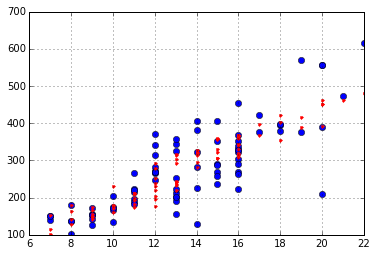

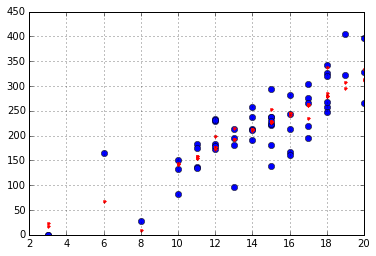

In [124]:
plot(data_1.conteo_restaurantes,data_1.conteo_ordenes,'bo')
plot(data_1.conteo_restaurantes,preds_1,'r.');grid();show()

plot(data_0.conteo_restaurantes,data_0.conteo_ordenes,'bo')
plot(data_0.conteo_restaurantes,preds_0,'r.');grid()

###Test

In [125]:
!ls

Ejemplos  prediccion.csv  sample_submission.csv  test_set.csv	   wc
hw8.pdf   README.md	  Solucion.ipynb	 training_set.csv


In [127]:
test_data = pd.read_csv('test_set.csv')
test_data['temp_m'] = (test_data['temp_max']+test_data['temp_min'])/2
test_data.head()

,fecha,cod_calendario,conteo_restaurantes,temp_max,temp_min,precipitacion,eventos,temp_m
0,2012-10-01,1,10,24.4,15.0,0.0,Ninguno,19.70
1,2012-10-02,1,11,21.1,12.8,0.0,Ninguno,16.95
2,2012-10-03,1,12,22.2,12.2,2.8,Lluvia,17.20
3,2012-10-04,1,12,21.7,7.2,10.7,Lluvia,14.45
4,2012-10-05,1,14,16.7,3.9,0.0,Ninguno,10.30


In [128]:
test_data.shape

(46, 8)

In [131]:
X_1 = test_data[test_data.cod_calendario==1]
X_0 = test_data[test_data.cod_calendario==0]
preds_1 = lm_1.predict(X_1)
preds_0 = lm_0.predict(X_0)

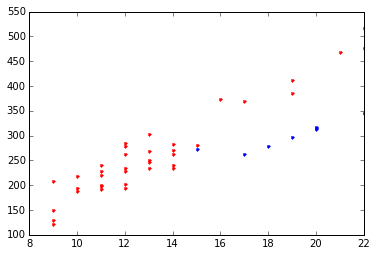

In [132]:
#plot(test_data.conteo_restaurantes,test_data.conteo_ordenes,'bo')
plot(X_1.conteo_restaurantes,preds_1,'r.');grid()
plot(X_0.conteo_restaurantes,preds_0,'b.');grid()

In [134]:
print(lm_1.rsquared)
print(lm_0.rsquared)

0.71626020456
0.740937263332


###Escribir resultados

In [135]:
!ls
!head sample_submission.csv

Ejemplos  prediccion.csv  sample_submission.csv  test_set.csv	   wc
hw8.pdf   README.md	  Solucion.ipynb	 training_set.csv
"fecha","conteo_ordenes"
"2012-10-01",500
"2012-10-02",400
"2012-10-03",300
"2012-10-04",100

In [144]:
fechas_1 = array(X_1.fecha)
fechas_0 = array(X_0.fecha)
fechas = concatenate((fechas_1, fechas_0),axis=0)
preds = concatenate((preds_1, preds_0),axis=0)
print(shape(fechas),shape(preds))

(46,) (46,)


In [145]:
prediccion = open('prediccion.csv','w')
encabezado = '"fecha","conteo_ordenes"\n'
prediccion.writelines(encabezado)

#Escribir los datos
for i in range(len(preds)):
    #print('"%s",%d'%(fechas[i],preds[i]))
    prediccion.writelines('"%s",%d\n'%(fechas[i],preds[i]))
prediccion.close()

In [146]:
!head prediccion.csv
!wc prediccion.csv

"fecha","conteo_ordenes"
"2012-10-01",187
"2012-10-02",220
"2012-10-03",228
"2012-10-04",203
"2012-10-05",262
"2012-10-06",122
"2012-10-07",217
"2012-10-08",198
"2012-10-09",200
 47  47 807 prediccion.csv


#Otros Intentos

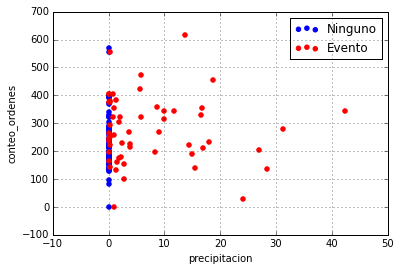

In [37]:
data_ninguno = data[data.eventos=='Ninguno']
data_evento = data[data.eventos!='Ninguno']

fig, axs = subplots(1, 1, sharey=True)
#data.plot(kind='scatter', x='cod_calendario', y='conteo_ordenes', ax=axs[0], figsize=(12, 6))
data_ninguno.plot(kind='scatter', x='precipitacion', y='conteo_ordenes', color='b',ax=axs,label='Ninguno')
data_evento.plot(kind='scatter', x='precipitacion', y='conteo_ordenes', color='r',ax=axs,label='Evento')
legend()